In [1]:
import re
import shutil
from pathlib import Path
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

In [2]:
def get_match_locus_ids(profile):
    locus_ids = []
    with open(profile) as f:
        next(f)
        for line in f:
            locus_id, allele_id = line.strip().split()
            locus_ids.append(locus_id)
    return set(locus_ids)


def get_all_profiles(dirpath):
    return [i for i in Path(dirpath).glob('*.tsv')]

def get_seq_ids(seqfile):
    return set(record.id for record in SeqIO.parse(seqfile, 'fasta'))

In [9]:
locud_ids = get_seq_ids('/media/Central_Lab_Storage/bo-han/Database/Escherichia_coli_O157/core_genome.faa')
all_profiles = get_all_profiles('/media/Central_Lab_Storage/NcbiASM/Escherichia_coli_O157/Profile')
new_scheme_mismatch = {Path(profile).stem: len(locud_ids-get_match_locus_ids(profile)) for profile in all_profiles}

In [48]:
locud_ids = get_seq_ids('/media/GenomicResearch/Issue/Benga/Escherichia_coli_O157.faa')
all_profiles = get_all_profiles('/media/Central_Lab_Storage/NcbiASM/Escherichia_coli_O157/Old_Profile/')
old_scheme_mismatch = {Path(profile).stem: len(locud_ids-get_match_locus_ids(profile)) for profile in all_profiles}

In [49]:
mismatch = pd.DataFrame({'new_scheme': new_scheme_mismatch, 'old_scheme': old_scheme_mismatch})

In [50]:
df = mismatch.melt(value_vars=['new_scheme', 'old_scheme'], var_name='scheme', value_name='void_loci')

<AxesSubplot:xlabel='scheme', ylabel='void_loci'>

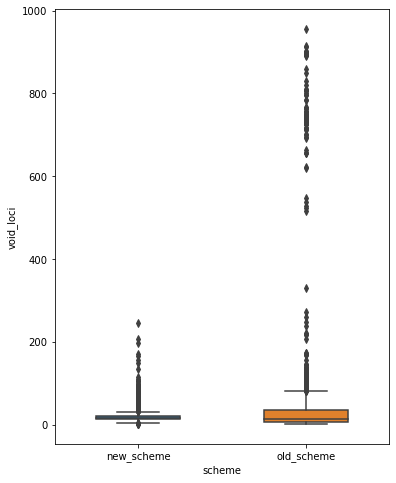

In [51]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.boxplot(x='scheme', y='void_loci', data=df, ax=ax, width=0.5)

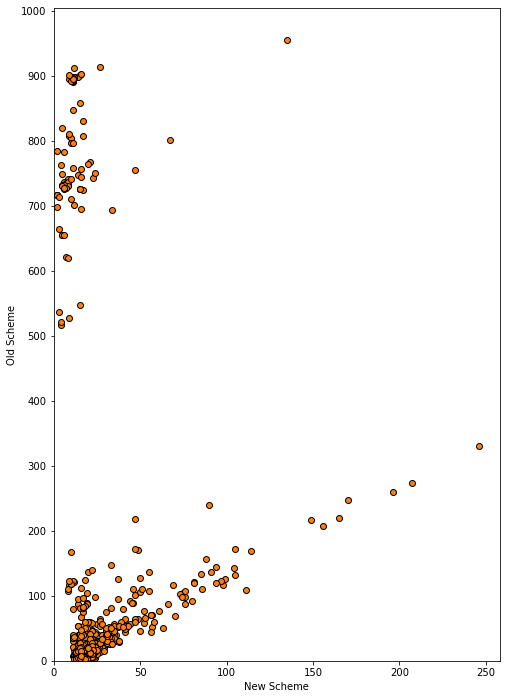

In [65]:
plt.figure(figsize=(8, 12))
plt.scatter(mismatch['new_scheme'], mismatch['old_scheme'], edgecolors='k', color='tab:orange')
plt.xlabel('New Scheme')
plt.ylabel('Old Scheme')
plt.yticks(range(0, 1001, 100))
plt.xlim(0)
plt.ylim(0)
plt.savefig('/media/Access/3_個人儲存區/陳柏翰/meeting/genomes_composition_analysis/Ec/O157_void_loci_num.png', facecolor='w', dpi=150, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>